In [56]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [57]:
!cp kaggle.json ~/.kaggle/

In [58]:
!kaggle datasets download -d emirhanai/planets-and-moons-dataset-ai-in-space

planets-and-moons-dataset-ai-in-space.zip: Skipping, found more recently modified local copy (use --force to force download)


In [59]:
!mkdir planets
!unzip /content/planets-and-moons-dataset-ai-in-space.zip -d planets

mkdir: cannot create directory ‘planets’: File exists
Archive:  /content/planets-and-moons-dataset-ai-in-space.zip
replace planets/.gitignore? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace planets/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace planets/Planets and Moons Dataset - AI in Space 🌌 🛰 ☄ 🔭.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace planets/Planets_Moons_Data/Planets and Moons/Earth/Earth (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace planets/Planets_Moons_Data/Planets and Moons/Earth/Earth (10).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace planets/Planets_Moons_Data/Planets and Moons/Earth/Earth (100).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace planets/Planets_Moons_Data/Planets and Moons/Earth/Earth (101).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [176]:
import numpy as np
import pandas as pd
import PIL as pl
import matplotlib.pyplot as plt

In [177]:
import pathlib
path_dir = '/content/planets/Planets_Moons_Data/Planets and Moons'
path_dir = pathlib.Path(path_dir)
path_dir

PosixPath('/content/planets/Planets_Moons_Data/Planets and Moons')

In [178]:
Earth = list(path_dir.glob('.ipynb_checkpoints/*'))
Earth[:5]

[]

In [179]:
planets = {
    'Earth' : list(path_dir.glob('Earth/*')),
    'Jupiter' : list(path_dir.glob('Jupiter/*')),
    'MakeMake' : list(path_dir.glob('MakeMake/*')),
    'Mars' : list(path_dir.glob('Mars/*')),
    'Mercury' : list(path_dir.glob('Mercury/*')),
    'Moon' : list(path_dir.glob('Moon/*')),
    'Neptune' : list(path_dir.glob('Neptune/*')),
    'Pluto' : list(path_dir.glob('Pluto/*')),
    'Saturn' : list(path_dir.glob('Saturn/*')),
    'Uranus' : list(path_dir.glob('Uranus/*')),
    'Venus' : list(path_dir.glob('Venus/*'))
}

In [180]:
planets_number = {}
n=0
for i in planets.keys():
  planets_number[i] = n
  n+=1

In [181]:
planets_number

{'Earth': 0,
 'Jupiter': 1,
 'MakeMake': 2,
 'Mars': 3,
 'Mercury': 4,
 'Moon': 5,
 'Neptune': 6,
 'Pluto': 7,
 'Saturn': 8,
 'Uranus': 9,
 'Venus': 10}

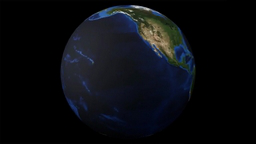

In [182]:
pl.Image.open(planets['Earth'][0])

In [183]:
import cv2

In [184]:
img = cv2.imread(str(planets['Mars'][0]))
img

array([[[3, 3, 3],
        [3, 3, 3],
        [2, 2, 2],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[1, 1, 1],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[1, 1, 1],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 2, 2],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[5, 5, 5],
        [2, 2, 2],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [185]:
img.shape

(144, 256, 3)

In [186]:
cv2.resize(img,(85,85)).shape

(85, 85, 3)

In [187]:
X , Y = [], []
x_images = []
for name, images in planets.items():
  for image in images:
    img = cv2.imread(str(image))
    x_images.append(img)
    img = cv2.resize(img, (85,85))
    img = img / 255
    X.append(img.flatten())
    Y.append(planets_number[name])

In [188]:
X = np.array(X)
Y = np.array(Y)

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [190]:
Y_train[0]

9

In [191]:
X_train.shape

(1310, 21675)

In [192]:
Y_train.shape

(1310,)

In [193]:
from sklearn.svm import SVC

In [194]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [195]:
models = {
    'svm' : {
        'model' : SVC(gamma = 'auto'),
        'params' : {
            'C' : [1, 10, 20],
            'kernel' : ['rbf', 'linear']
        }
    },
    'random_forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [5, 10]
        }
    },
    'decision_tree' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion' : ['gini', 'entropy']
        }
    }
}

In [196]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in models.items():
  clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score = False)
  clf.fit(X_train, Y_train)
  scores.append({
      'model' : model_name,
      'best_score' : clf.best_score_,
      'best_params' : clf.best_params_
      })
  
df = pd.DataFrame(scores, columns = ['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.997710,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.996947,{'n_estimators': 10}
2,decision_tree,0.982443,{'criterion': 'entropy'}


In [197]:
model = SVC(C= 1, kernel= 'linear')

In [198]:
model.fit(X_train, Y_train)

SVC(C=1, kernel='linear')

In [199]:
model.score(X_test, Y_test)

1.0

In [200]:
def pre_planet(img):
  planets = {0: 'Earth',
 1:'Jupiter',
 2:'MakeMake',
 3:'Mars',
 4:'Mercury',
 5:'Moon',
 6:'Neptune',
 7:'Pluto',
 8:'Saturn',
 9:'Uranus',
 10:'Venus'}
  img = cv2.imread(str(img))
  plt.imshow(img)
  img = cv2.resize(img, (85,85))
  img = img/255
  img = img.flatten()
  return planets[model.predict([img])[0]]

'Neptune'

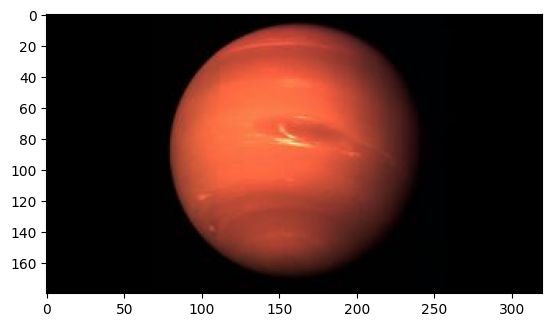

In [215]:
pre_planet('/content/neptune.jpg')

'Pluto'

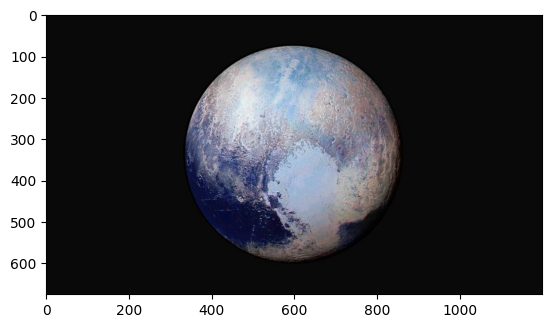

In [208]:
pre_planet('/content/pluto.jpg')

In [203]:
import pickle
pickle.dump(planets_number,open('planets_list.pkl','wb'))

In [204]:
# save the model to disk
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

1.0
